In [231]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [232]:
# Carga de todos los csv en la carpeta 'mediciones'
files = os.listdir('mediciones')

# Lista de dataframes
dfs = [pd.read_csv('mediciones/' + file) for file in files]

# Nombre de las futuras columnas
columns = [f.replace(".csv", "") for f in files ]


In [233]:
# Verifico que todos los dataframes tengan la misma columna de tiempo
time_cols = [df['time'].tolist() for df in dfs]
for i, time_col in enumerate(time_cols):
    if time_col != time_cols[0]:
        print(f'Dataframe {i} es diferente!')
        break
    else:
        print(f'Df {i} vs 0: Todas las filas son iguales')

Df 0 vs 0: Todas las filas son iguales
Df 1 vs 0: Todas las filas son iguales
Df 2 vs 0: Todas las filas son iguales
Df 3 vs 0: Todas las filas son iguales
Df 4 vs 0: Todas las filas son iguales
Df 5 vs 0: Todas las filas son iguales
Df 6 vs 0: Todas las filas son iguales
Df 7 vs 0: Todas las filas son iguales


In [234]:
# Concateno todos los dataframes sobre una única columna time
df = pd.concat([df['(V)'] for df in dfs], axis=1)
df.columns = columns
df['time'] = time_cols[0]

# Convierto la columna time en indice
df.set_index('time', inplace=True)

# Reordeno columnas usando parte numerica del nombre
columns = sorted(columns, key=lambda x: int(x[:-2]))
df = df[columns]

df.head()

,181mm,261mm,552mm,644mm,743mm,839mm,927mm,1042mm
time,,,,,,,,
0.000,0.355050,0.347517,0.357561,0.360072,0.360072,0.360072,0.357561,0.355050
0.005,0.355050,0.355050,0.365094,0.357561,0.367605,0.360072,0.357561,0.357561
0.010,0.355050,0.347517,0.355050,0.367605,0.365094,0.362583,0.357561,0.357561
0.015,0.357561,0.339984,0.357561,0.362583,0.357561,0.357561,0.350028,0.357561
0.020,0.347517,0.355050,0.357561,0.362583,0.355050,0.360072,0.365094,0.357561


In [235]:
# 1 A
# Vemos los valores de 0 y 1
print(df['181mm'][0.0])
print(df['181mm'][2.0])

0.35505
4.458015


In [236]:
# 1 B

# Funcione auxiliares para bajar la frecuencia artificialmente

def is_close_to_integer(x, tolerance=1e-4):
    return np.isclose(x, round(x), atol=tolerance)

def is_multiple(x, multiple):
    return is_close_to_integer(x/multiple)

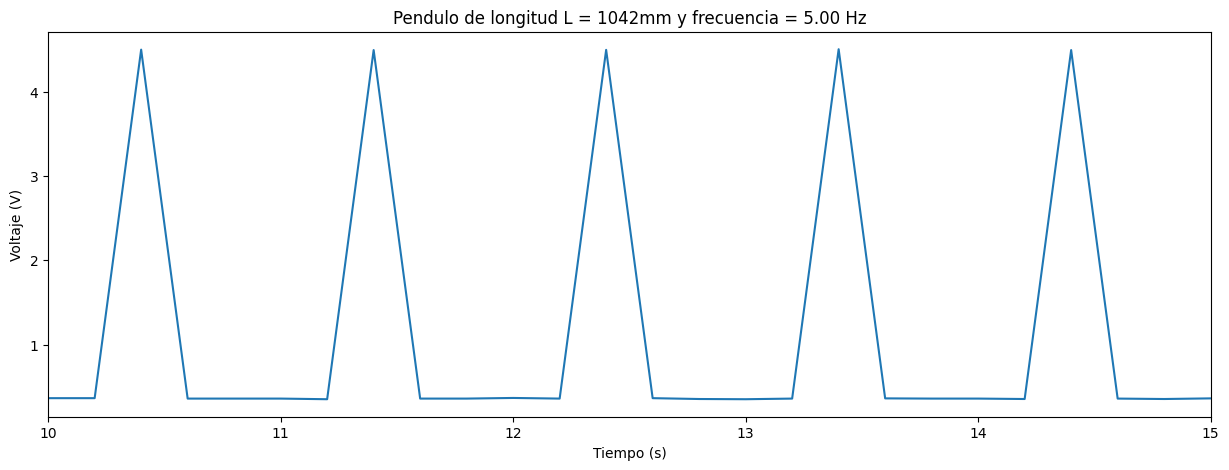

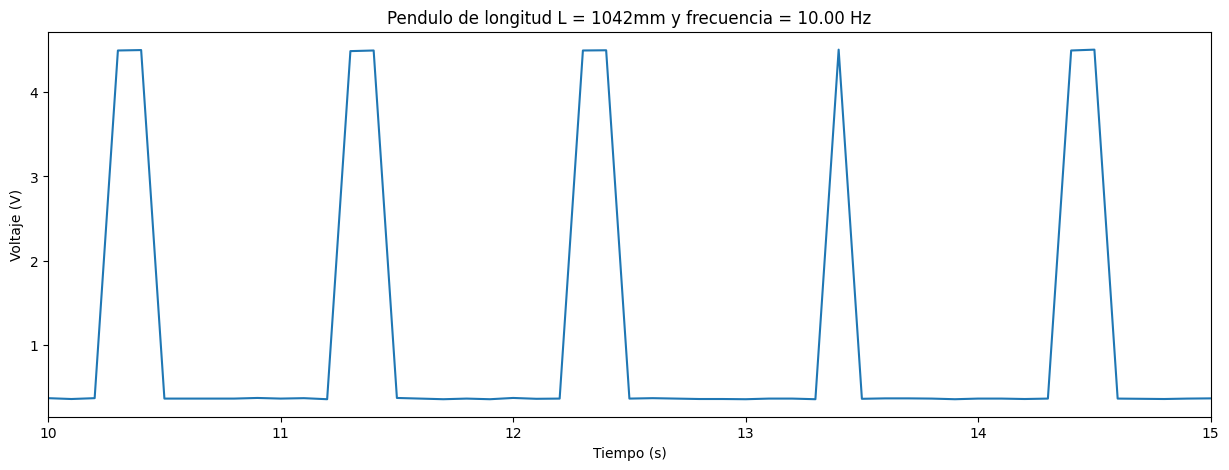

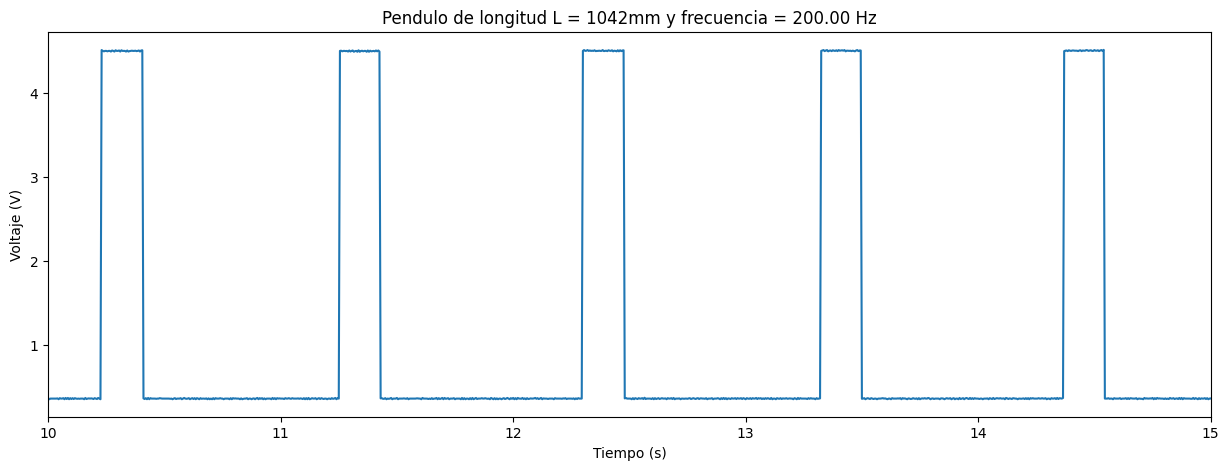

In [237]:
freqs = [1/5, 1/10, 1/200]

for freq in freqs:
    a = (df['1042mm'].index).tolist()
    result = [is_multiple(num, freq) for num in a]
    df_low_freq = df[result]

    fig = plt.figure(figsize=(15,5))
    df_low_freq['1042mm'].plot()
    plt.title(f"Pendulo de longitud L = {c} y frecuencia = {1/freq:.2f} Hz")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Voltaje (V)")
    plt.xlim([10, 15])
    plt.show()

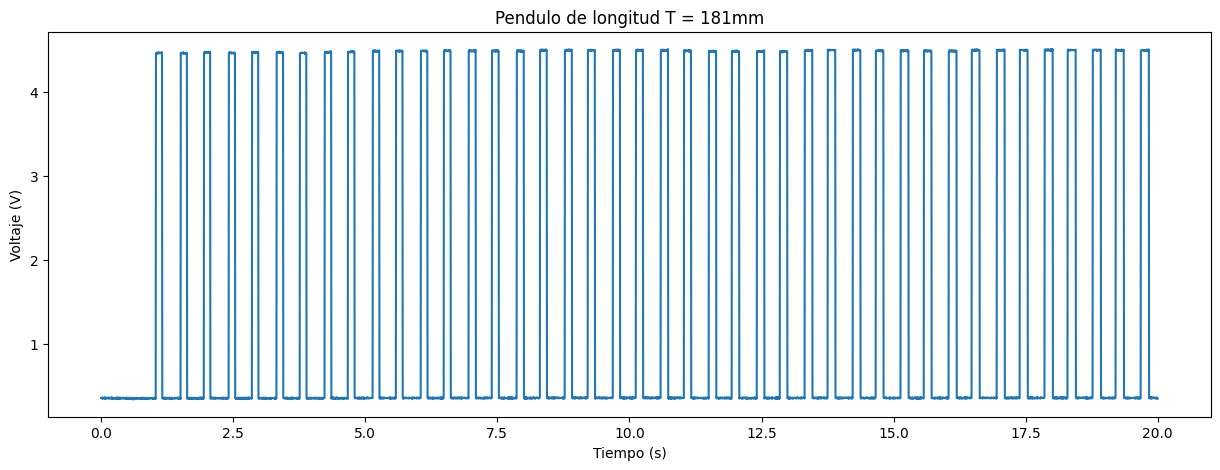

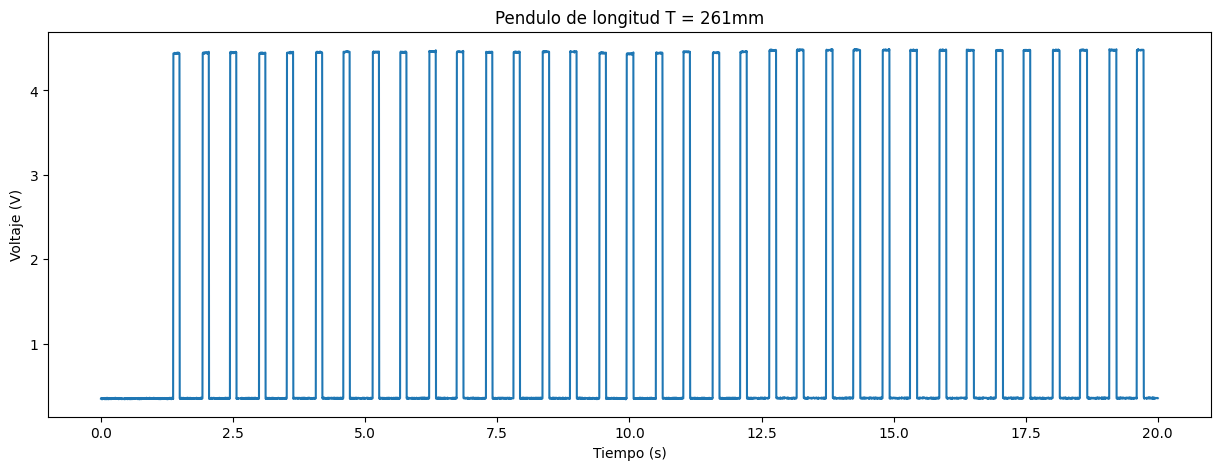

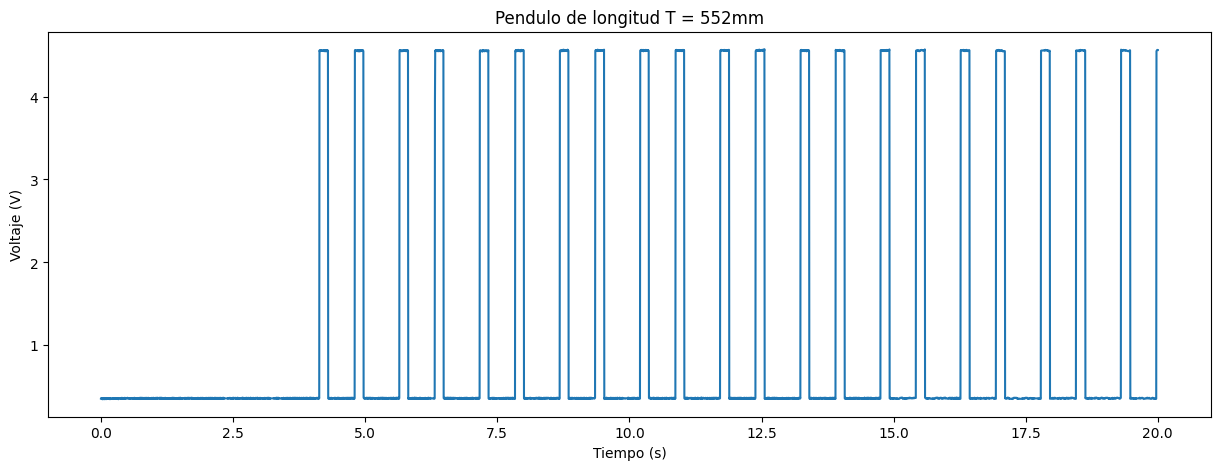

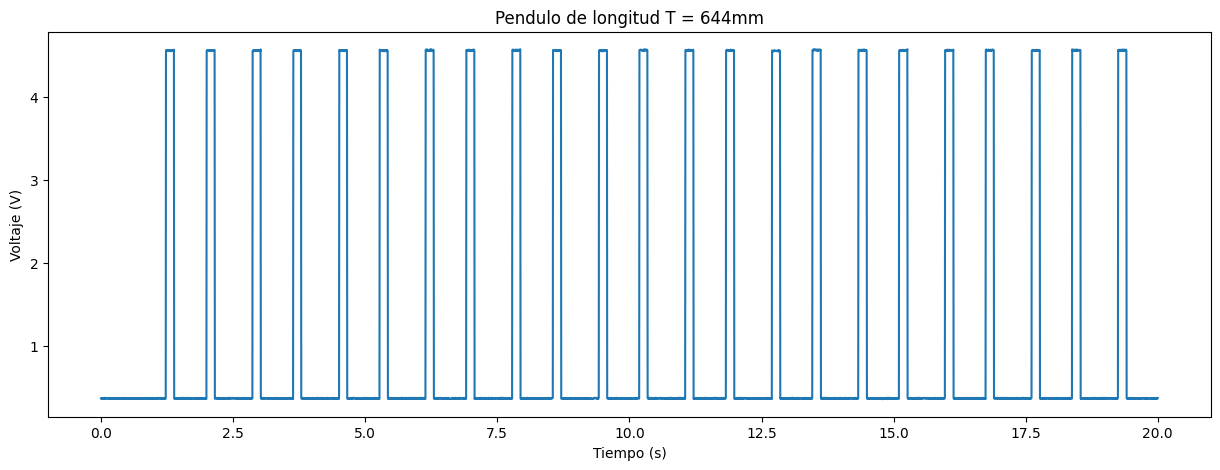

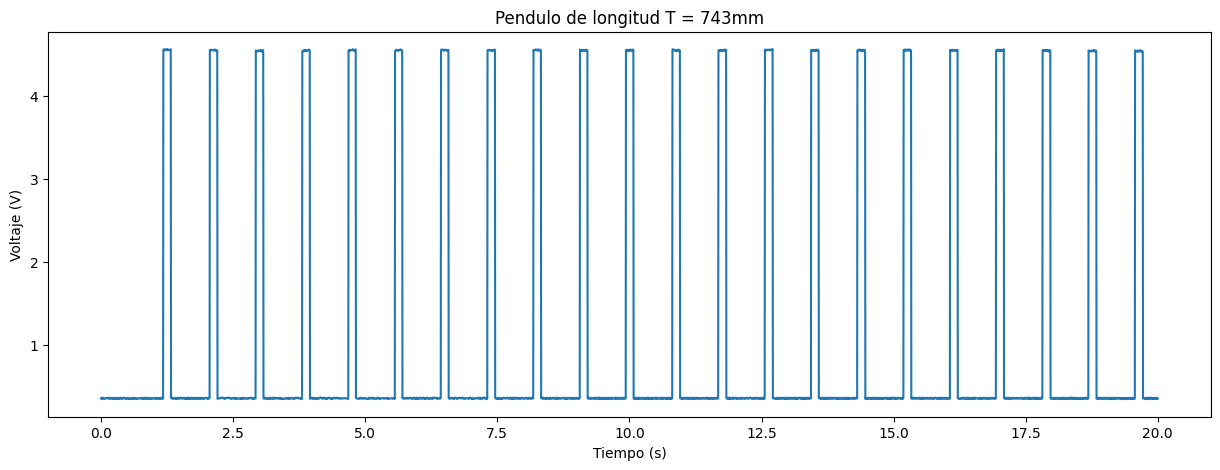

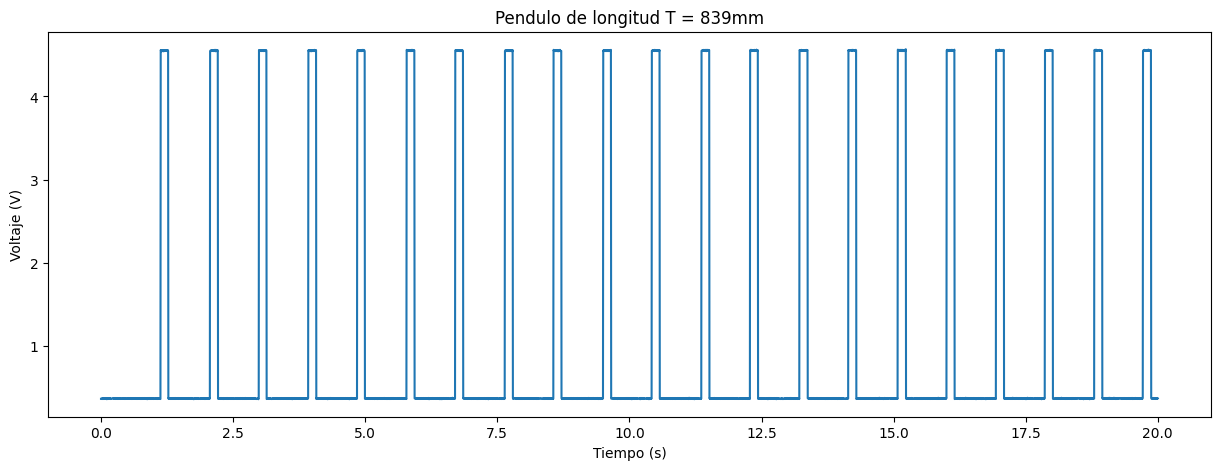

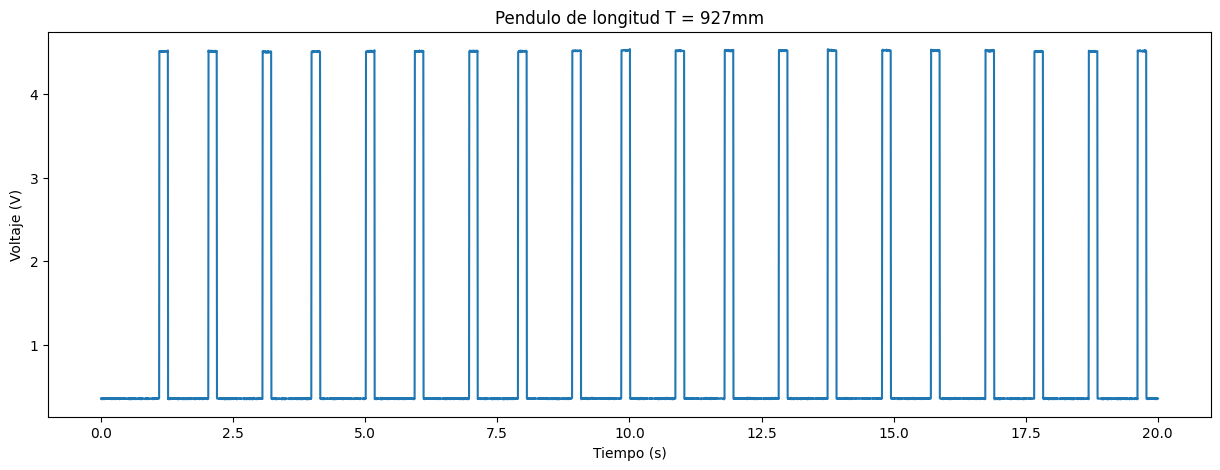

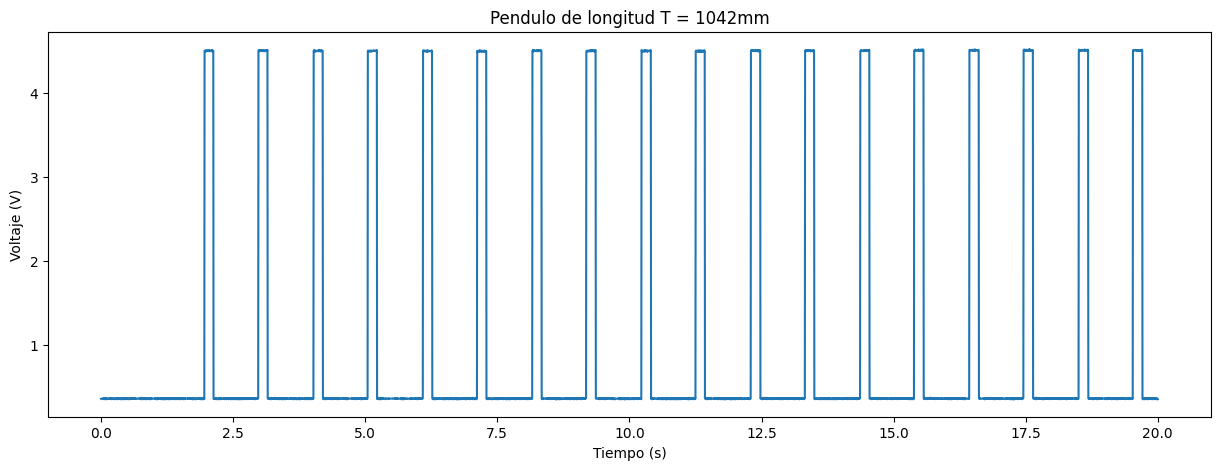

In [238]:
# Grafico todas las señales
for c in columns:
    plt.figure(figsize=(15,5))
    df[c].plot()
    plt.title(f"Pendulo de longitud T = {c}")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Voltaje (V)")
    plt.show()

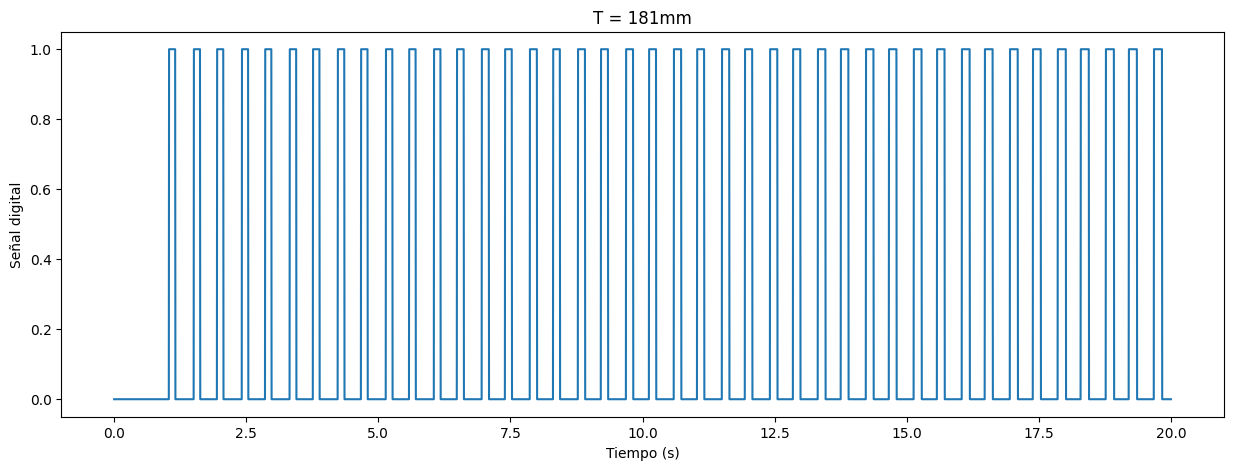

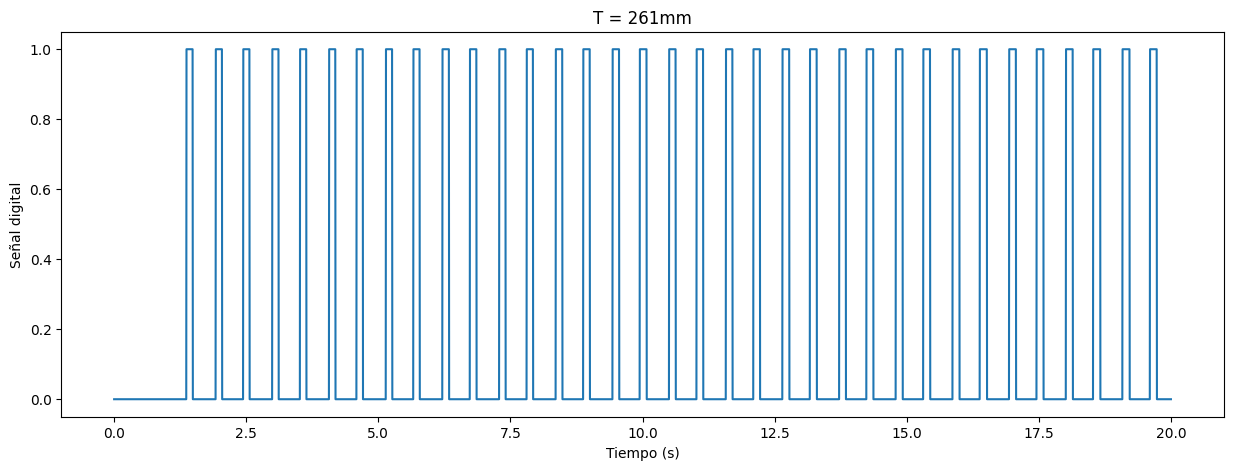

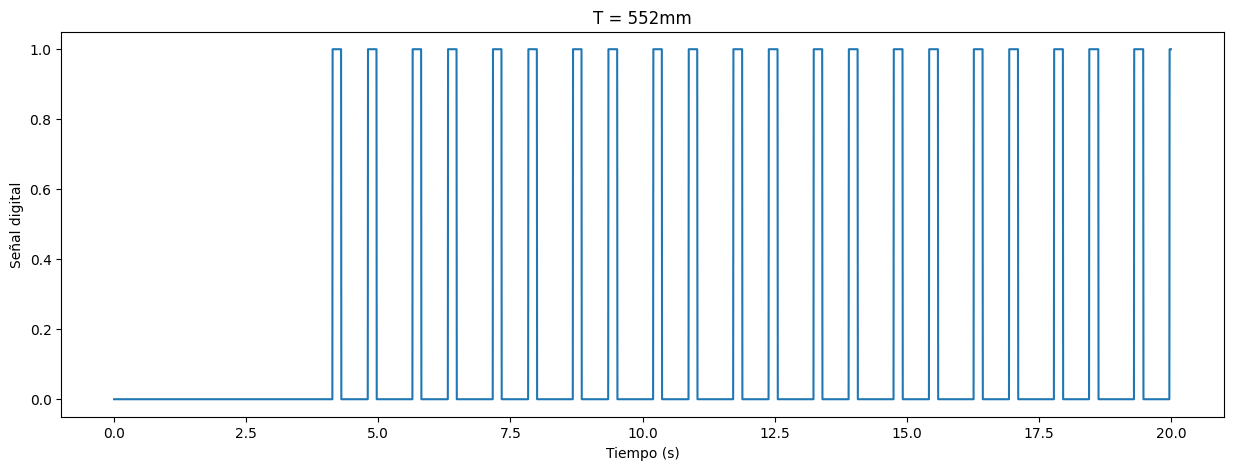

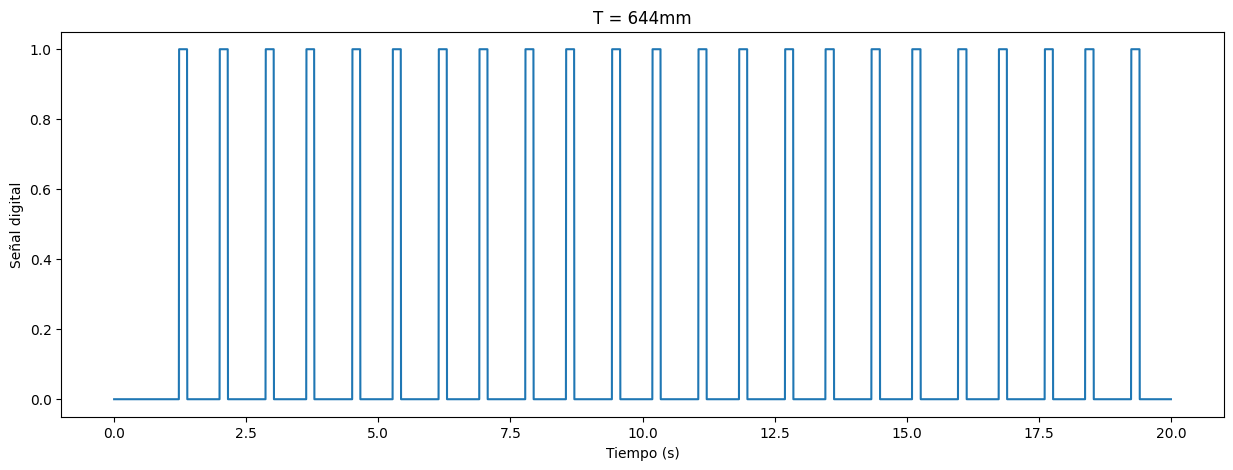

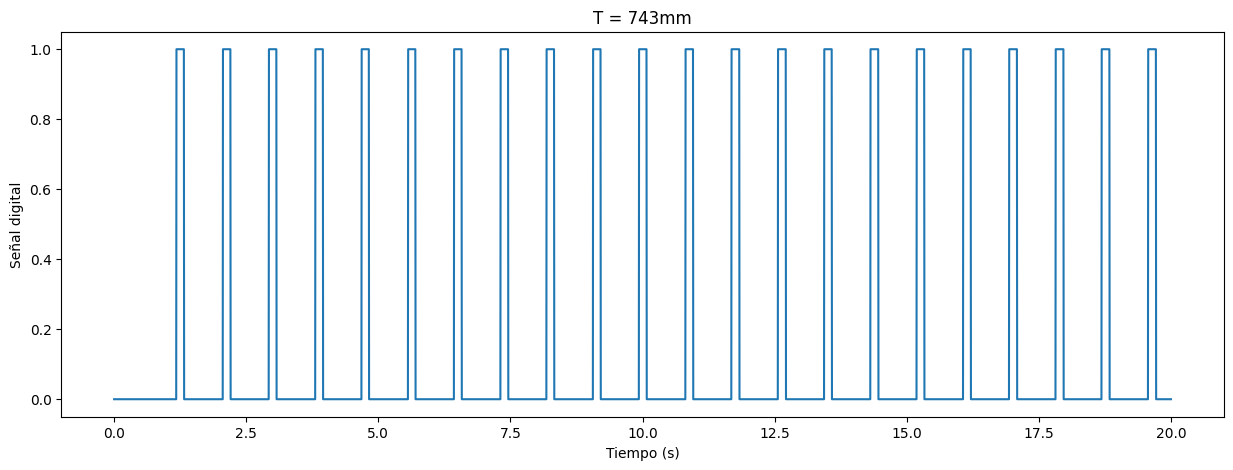

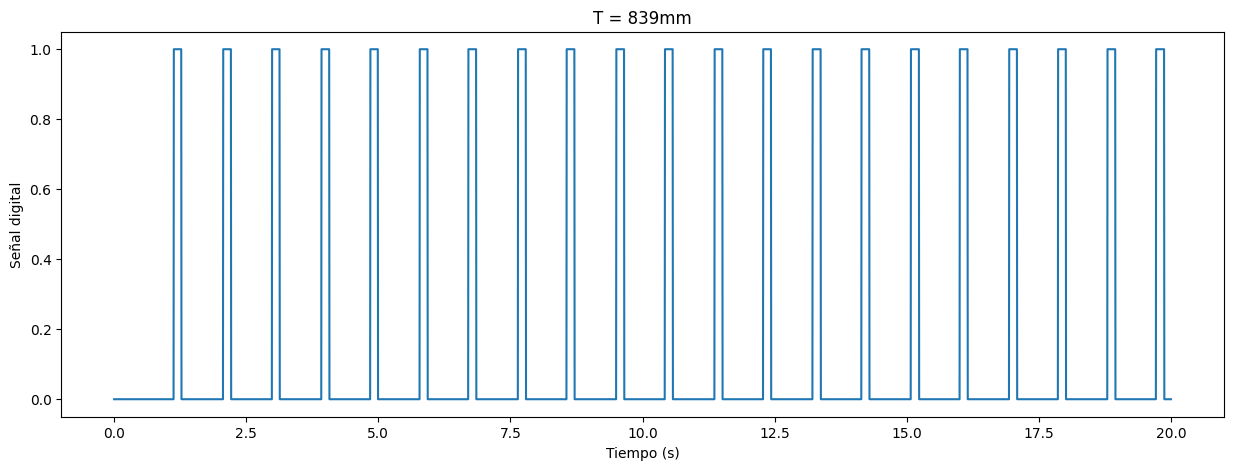

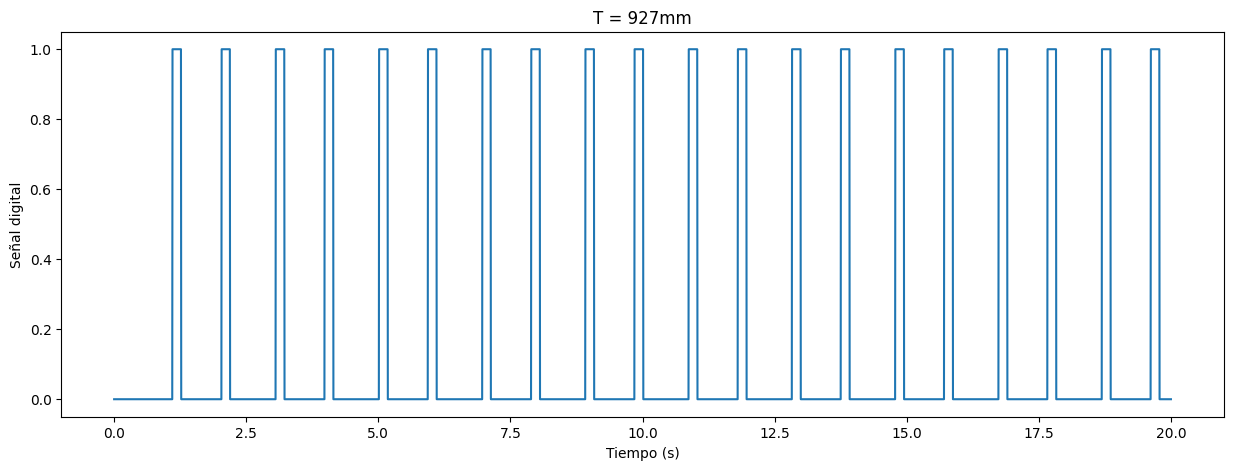

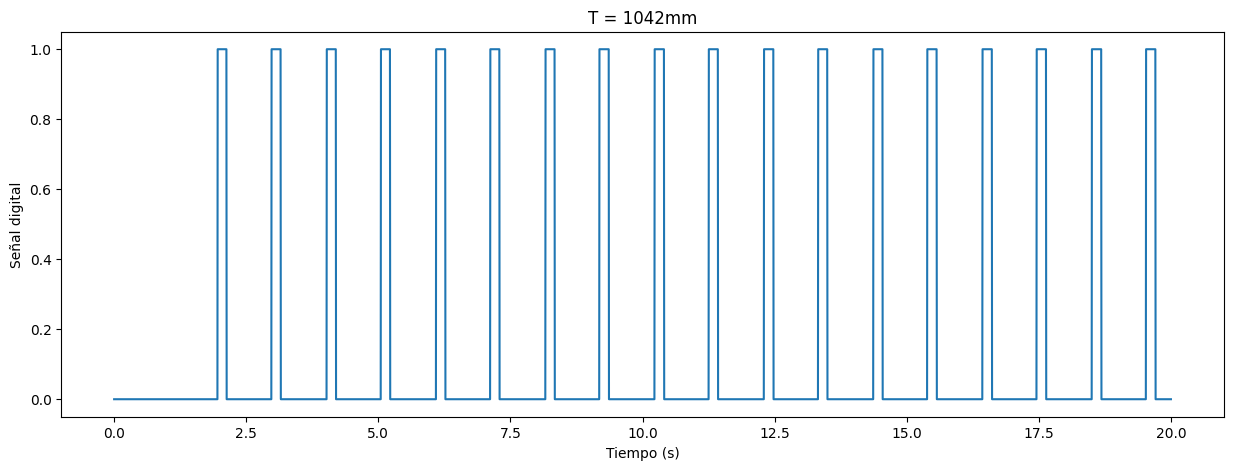

In [239]:
# Duplico y digitalizo cada columna: Si V es mayor a 3, entonces 1, sino 0
df_digital = df.apply(lambda x: x > 3).astype(int)

# Señales digitales
for c in columns:
    plt.figure(figsize=(15,5))
    df_digital[c].plot()
    plt.title(f"T = {c}")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Señal digital")
    plt.show()

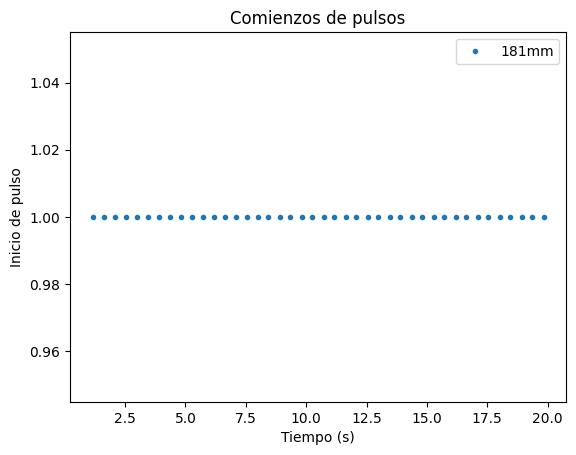

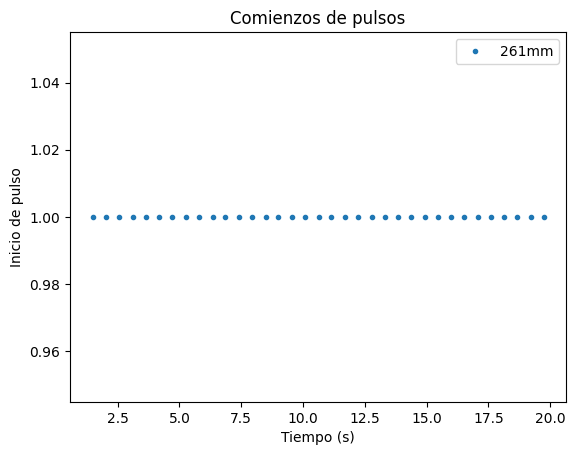

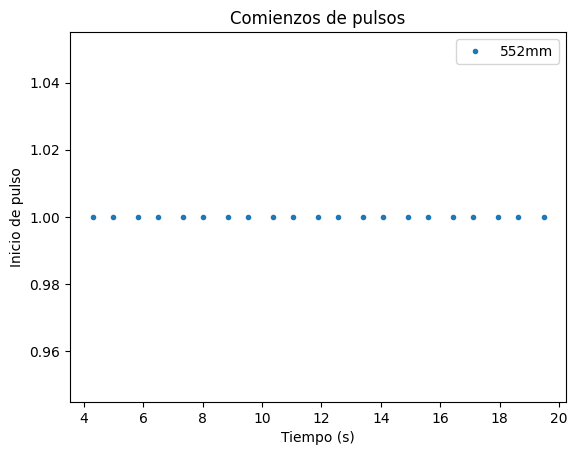

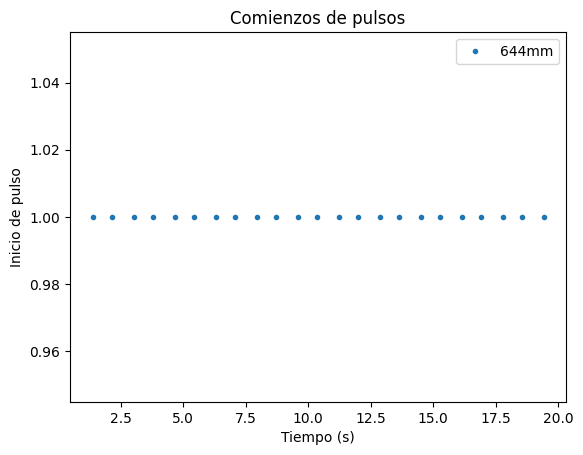

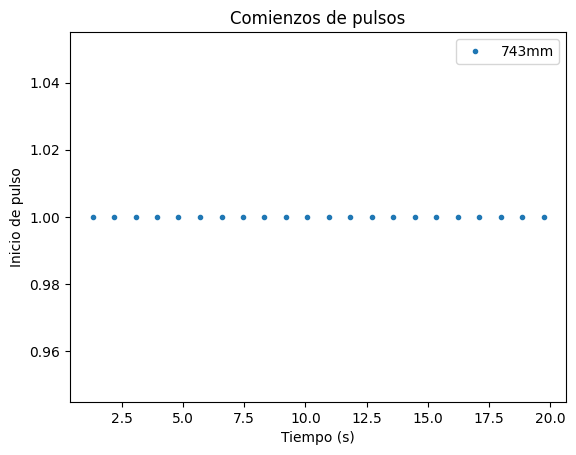

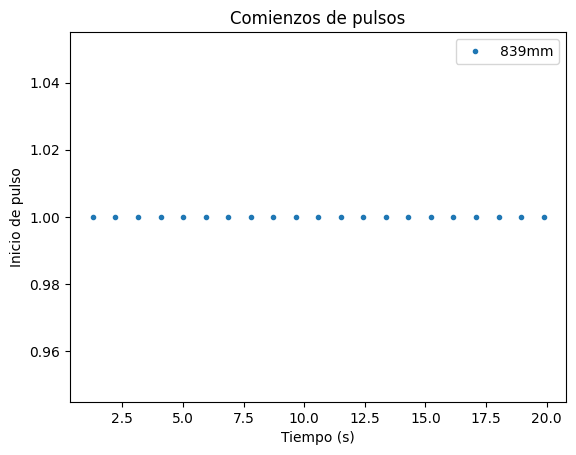

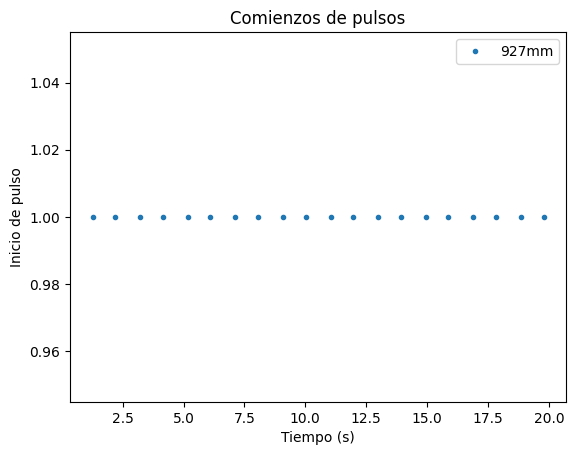

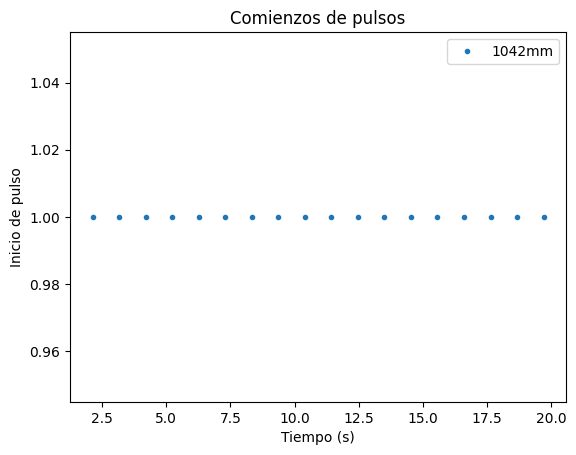

In [240]:
# Creo lista de dataframes solo con los comienzos de cada pulso
starts_dfs = [df_digital[c].diff().apply(lambda x: x == -1).astype(int) for c in columns]

# Borro filas con zeros de cada df
starts_dfs = [df[df == 1].dropna() for df in starts_dfs]

for s in starts_dfs:
    s.plot(style='.')
    plt.title("Comienzos de pulsos")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Inicio de pulso")
    plt.legend()
    plt.show()

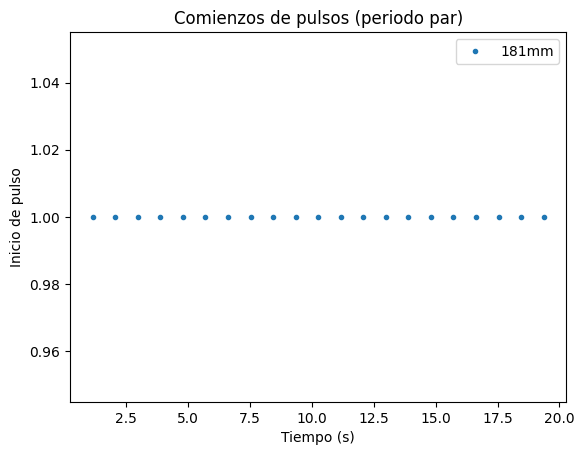

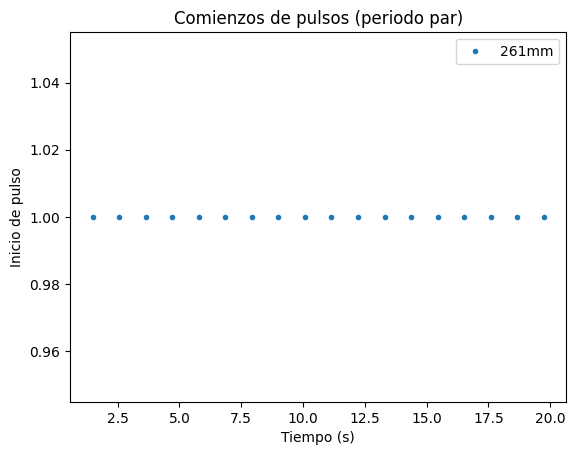

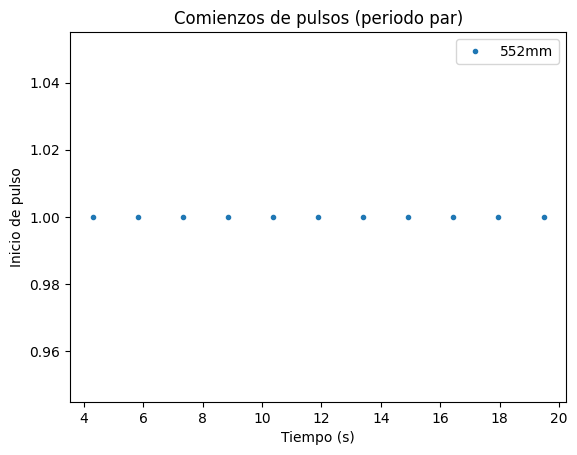

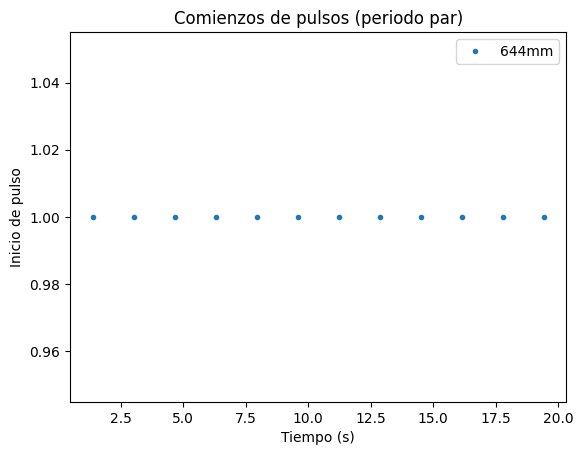

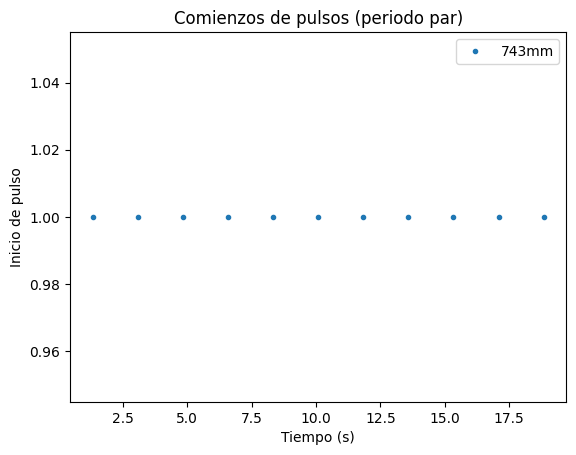

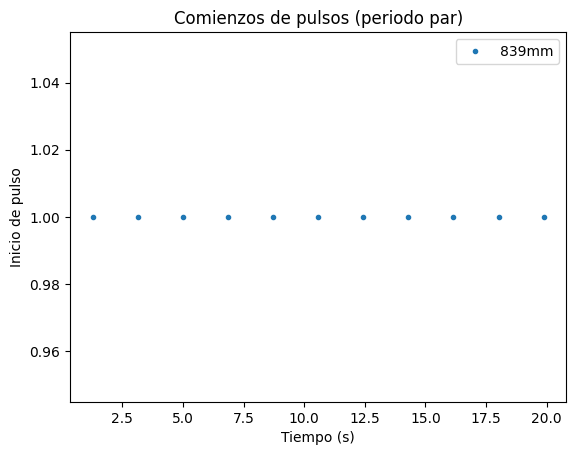

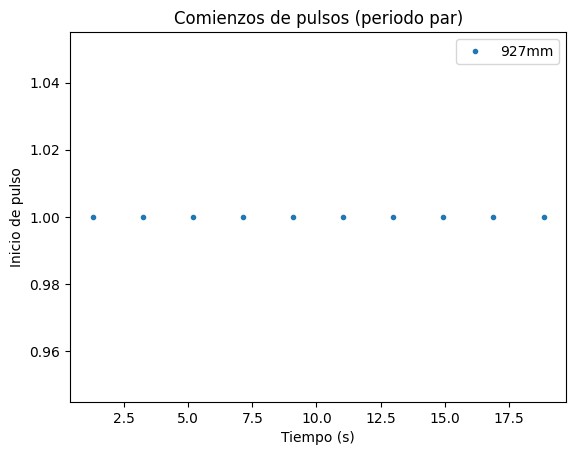

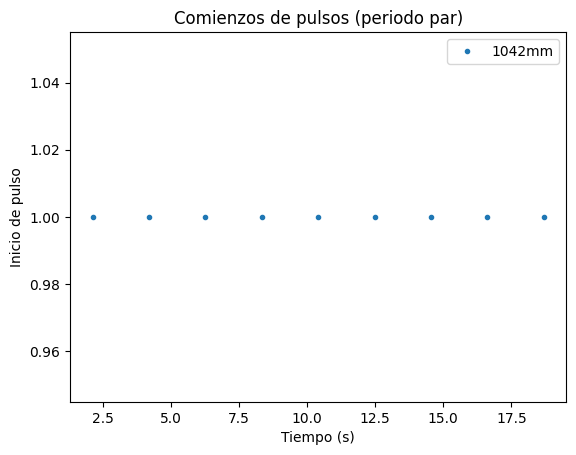

In [241]:
# Separo filas pares e impares
even_period_dfs = [df.iloc[::2] for df in starts_dfs]
odd_period_dfs = [df.iloc[1::2] for df in starts_dfs]


for p in even_period_dfs:
    p.plot(style='.')
    plt.title("Comienzos de pulsos (periodo par)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Inicio de pulso")
    plt.legend()

    plt.show()

In [242]:
# Convierto index como columna de tiempo
even_period_dfs = [df.reset_index(inplace=False) for df in even_period_dfs]
odd_period_dfs = [df.reset_index(inplace=False) for df in odd_period_dfs]


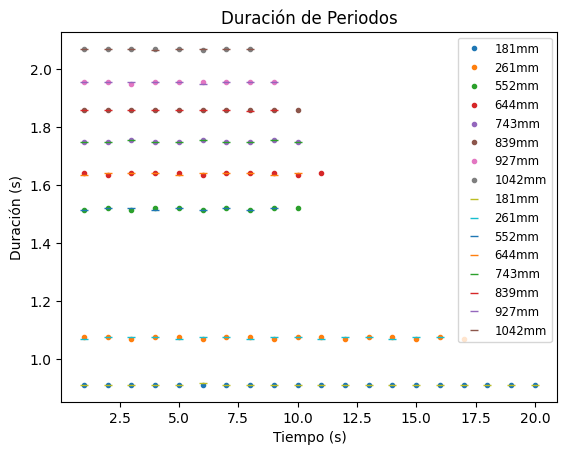

In [243]:
for i in range(len(even_period_dfs)):
    even_period_dfs[i]['time'].diff().plot(style='.')

for i in range(len(odd_period_dfs)):
    odd_period_dfs[i]['time'].diff().plot(style='_')

plt.title("Duración de Periodos")
plt.xlabel("Tiempo (s)")
plt.ylabel("Duración (s)")
plt.legend(columns+columns, fontsize='small')
plt.show()

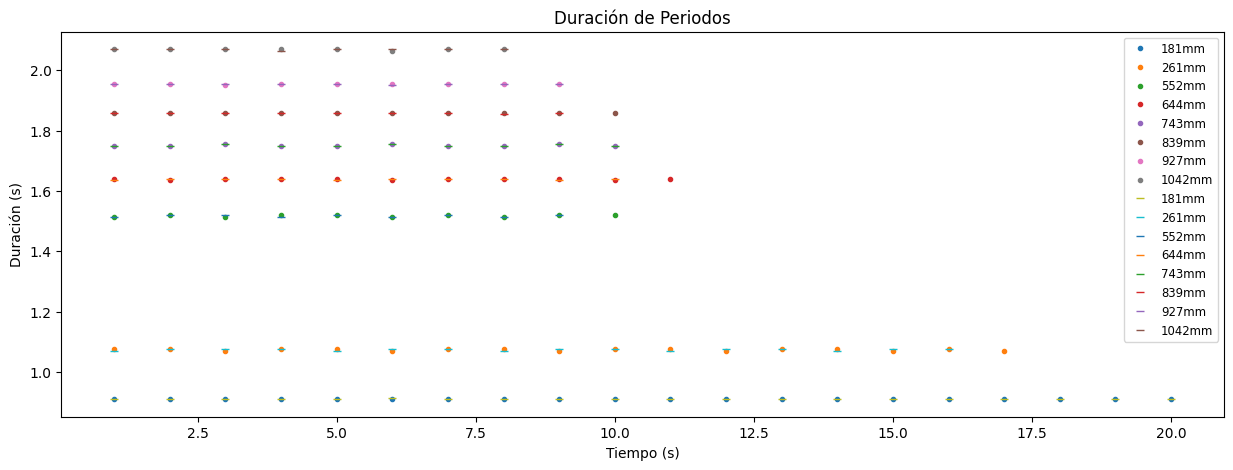

In [244]:

plt.figure(figsize=(15,5))

for i in range(len(even_period_dfs)):
    even_period_dfs[i]['time'].diff().plot(style='.')

for i in range(len(odd_period_dfs)):
    odd_period_dfs[i]['time'].diff().plot(style='_')

plt.title("Duración de Periodos")
plt.xlabel("Tiempo (s)")
plt.ylabel("Duración (s)")
plt.legend(columns+columns, fontsize='small')
plt.show()

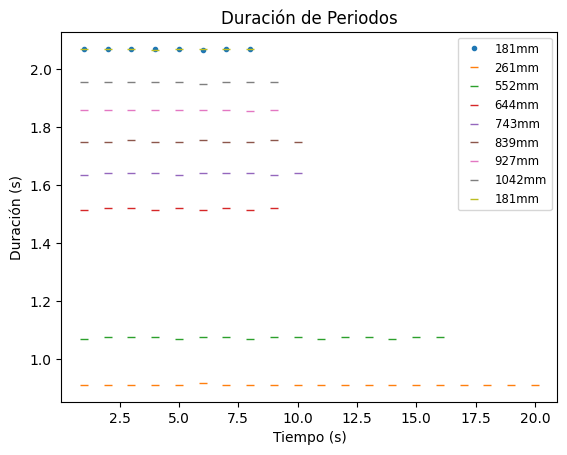

In [245]:
even_period_dfs[i]['time'].diff().plot(style='.')

for i in range(len(odd_period_dfs)):
    odd_period_dfs[i]['time'].diff().plot(style='_')

plt.title("Duración de Periodos")
plt.xlabel("Tiempo (s)")
plt.ylabel("Duración (s)")
plt.legend(columns+columns, fontsize='small')
plt.show()

In [246]:
def get_values(even_df, odd_df):
    return list(even_df['time'].diff().dropna().values) + list(odd_df['time'].diff().dropna().values)

/tmp/ipykernel_368214/3967708373.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  boxplot_df = pd.concat([boxplot_df, data], ignore_index=True)


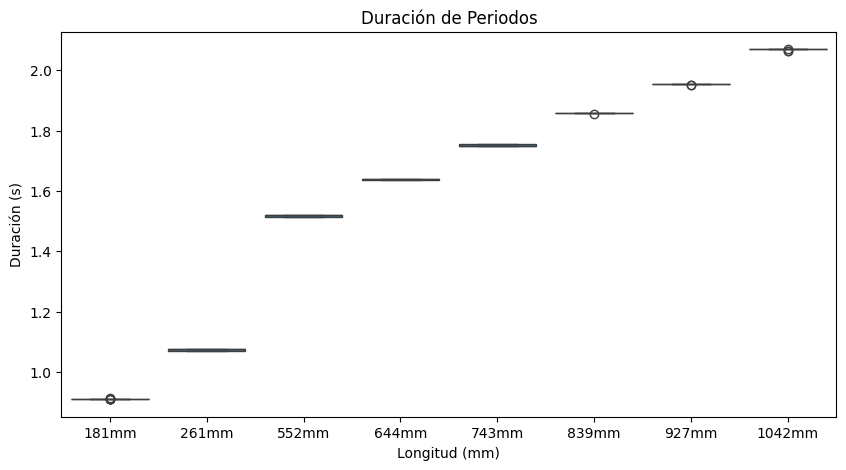

In [247]:

plt.figure(figsize=(10,5))
plt.title("Duración de Periodos")
plt.xlabel("Longitud (mm)")
plt.ylabel("Duración (s)")

boxplot_df = pd.DataFrame(columns=['Pendulo', 'Periodo'])

for i in range(len(even_period_dfs)):
    data = np.array(get_values(even_period_dfs[i], odd_period_dfs[i]))
    data = pd.DataFrame({'Pendulo': columns[i], 'Periodo': data})
    boxplot_df = pd.concat([boxplot_df, data], ignore_index=True)

sns.boxplot(data=boxplot_df, x="Pendulo", y="Periodo")

plt.show()

In [248]:
duraciones = [get_values(even_df, odd_df) for even_df, odd_df in zip(even_period_dfs, odd_period_dfs)]

period_means = [np.mean(d) for d in duraciones]
period_stds = [np.std(d) for d in duraciones]
period_amounts = [len(d) for d in duraciones]

g_real = 9.79687

errores = []
errores_porcentuales = []
longitudes = []
periodos = []
periodos_ideales = []

for c, T_est, s, a in zip(columns, period_means, period_stds, period_amounts):
    print(f"L = {c} - {a} mediciones")
    print(f"Periodo medio:   {T_est:.6f}")
    print(f"Desvio estandar: {s:.6f}")
    L = float(c.replace("mm", "")) / 1000

    T_ideal = 2 * np.pi * np.sqrt(L / g_real)
    
    # Local gravity https://www.sensorsone.com/local-gravity-calculator/#local-gravity
    print(f"Periodo esperado: {T_ideal:.6f}")

    error = abs(T_ideal - T_est)
    error_porcentual = error / T_ideal * 100
    print(f"Error: {error:.6f}")
    print(f"Error: {error_porcentual:.6f}%")
    errores.append(error)
    errores_porcentuales.append(error_porcentual)
    longitudes.append(L)
    periodos.append(T_est)
    periodos_ideales.append(T_ideal)
    print("-"*50)


L = 181mm - 40 mediciones
Periodo medio:   0.910125
Desvio estandar: 0.000781
Periodo esperado: 0.854035
Error: 0.056090
Error: 6.567692%
--------------------------------------------------
L = 261mm - 33 mediciones
Periodo medio:   1.073333
Desvio estandar: 0.002357
Periodo esperado: 1.025549
Error: 0.047784
Error: 4.659382%
--------------------------------------------------
L = 552mm - 19 mediciones
Periodo medio:   1.517895
Desvio estandar: 0.002469
Periodo esperado: 1.491440
Error: 0.026455
Error: 1.773784%
--------------------------------------------------
L = 644mm - 21 mediciones
Periodo medio:   1.638571
Desvio estandar: 0.002259
Periodo esperado: 1.610939
Error: 0.027632
Error: 1.715292%
--------------------------------------------------
L = 743mm - 20 mediciones
Periodo medio:   1.751500
Desvio estandar: 0.002291
Periodo esperado: 1.730337
Error: 0.021163
Error: 1.223078%
--------------------------------------------------
L = 839mm - 19 mediciones
Periodo medio:   1.859737
Des

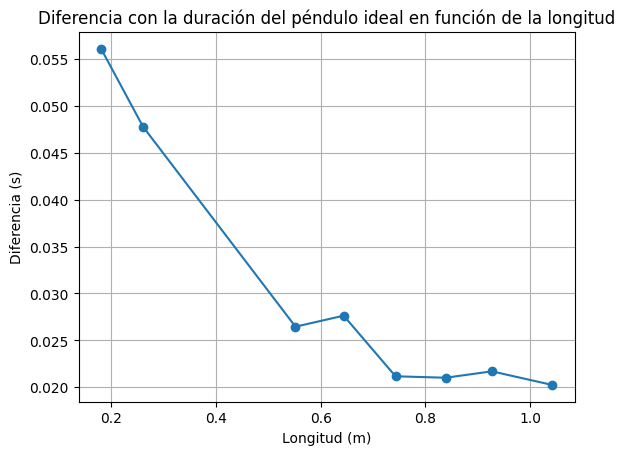

In [249]:
plt.plot(longitudes, errores, '-o')
plt.xlabel("Longitud (m)")
plt.ylabel("Diferencia (s)")
plt.title("Diferencia con la duración del péndulo ideal en función de la longitud")
plt.grid()
# Add vertical line and xtick in x axis at each x point value
#plt.xticks(longitudes)

plt.show()


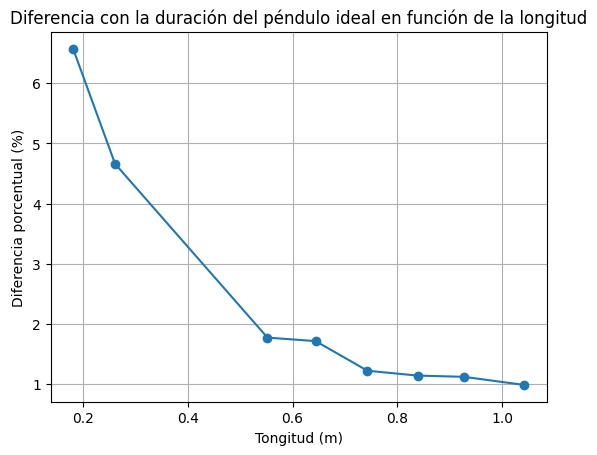

In [250]:
plt.plot(longitudes, errores_porcentuales, '-o')
plt.xlabel("Tongitud (m)")
plt.ylabel("Diferencia porcentual (%)")
plt.title("Diferencia con la duración del péndulo ideal en función de la longitud")
plt.grid()
# Add vertical line and xtick in x axis at each x point value
#plt.xticks(longitudes)

plt.show()

In [251]:
# 2 A
#Veamos Ta incerteza en la longitud del hilo T y el periodo T

def deltaL(L):  # no considera errores estadísticos
    return 0.001 # error instrumental de 1 mm

def deltaT(desv, n):
    return np.sqrt((1 / 200) ** 2 + (desv / np.sqrt(n)) ** 2)

incertezas = pd.DataFrame(columns=['L', 'dL', 'T', 'dT'])
for c, T, s, n, L in zip(columns, period_means, period_stds, period_amounts, longitudes):
    incertezas.loc[len(incertezas)] = [L, deltaL(L), T, deltaT(s, n)]

incertezas

,L,dL,T,dT
0,0.181,0.001,0.910125,0.005002
1,0.261,0.001,1.073333,0.005017
2,0.552,0.001,1.517895,0.005032
3,0.644,0.001,1.638571,0.005024
4,0.743,0.001,1.751500,0.005026
5,0.839,0.001,1.859737,0.005007
6,0.927,0.001,1.954444,0.005014
7,1.042,0.001,2.069375,0.005017


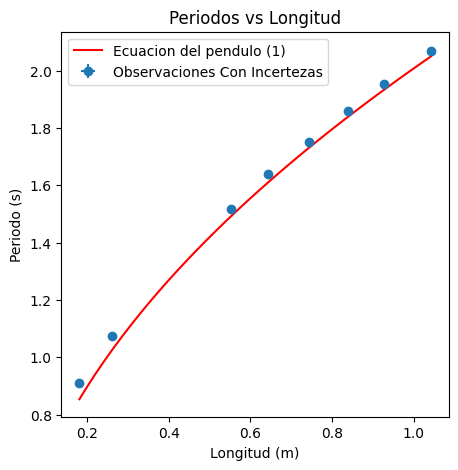

In [252]:
# 2 B

plt.figure(figsize=(5,5))
plt.title("Periodos vs Longitud")
plt.xlabel("Longitud (m)")
plt.ylabel("Periodo (s)")

plt.errorbar(incertezas['L'], incertezas['T'], xerr=incertezas['dL'], yerr=incertezas['dT'], fmt='o', label='Observaciones Con Incertezas')

x_values = np.linspace(min(incertezas['L']), max(incertezas['L']), 100)

def ecuacion_del_pendulo(l):
    return 2 * np.pi * np.sqrt(l/g_real)

plt.plot(x_values, ecuacion_del_pendulo(x_values), color='red', label='Ecuacion del pendulo (1)')

plt.legend()

plt.show()


In [253]:
# 2 C

def delta_sqrtL(sqrt_L, dL):
    return 1 / (2 * sqrt_L) * dL

incertezas['sqrt_L'] = incertezas.apply(lambda row: np.sqrt(row['L']), axis=1)
incertezas['d_sqrt_L'] = incertezas.apply(lambda row: delta_sqrtL(row['sqrt_L'], row['dL']), axis=1)

incertezas

,L,dL,T,dT,sqrt_L,d_sqrt_L
0,0.181,0.001,0.910125,0.005002,0.425441,0.001175
1,0.261,0.001,1.073333,0.005017,0.510882,0.000979
2,0.552,0.001,1.517895,0.005032,0.742967,0.000673
3,0.644,0.001,1.638571,0.005024,0.802496,0.000623
4,0.743,0.001,1.751500,0.005026,0.861974,0.000580
5,0.839,0.001,1.859737,0.005007,0.915969,0.000546
6,0.927,0.001,1.954444,0.005014,0.962808,0.000519
7,1.042,0.001,2.069375,0.005017,1.020784,0.000490


In [254]:
def error_relativo(dX, X):
    return dX / X

def mayorError(df):
    res = []
    erroresRelativosT = []
    erroresRelativos_sqrt_L = []

    for index, row in df.iterrows():
        errorRelativoT = error_relativo(row['dT'], row['T'])
        errorRelativo_sqrt_L = error_relativo(row['d_sqrt_L'], row['sqrt_L'])

        if errorRelativoT > errorRelativo_sqrt_L:
            res.append("T")
        else:
            res.append("sqrt_L")

        erroresRelativosT.append(errorRelativoT)
        erroresRelativos_sqrt_L.append(errorRelativo_sqrt_L)

    return (res, erroresRelativosT, erroresRelativos_sqrt_L)


res, erroresRelativosT, erroresRelativos_sqrt_L = mayorError(incertezas)

print(erroresRelativosT)

print(erroresRelativos_sqrt_L)

print(res)



[0.0054954244806861745, 0.004674043574611448, 0.0033150997238031565, 0.003066229889728534, 0.0028696439926640506, 0.0026920778849548253, 0.0025652807221301674, 0.002424432853820951]
[0.0027624309392265197, 0.0019157088122605363, 0.0009057971014492752, 0.0007763975155279504, 0.0006729475100942128, 0.0005959475566150178, 0.0005393743257820928, 0.00047984644913627654]
['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']


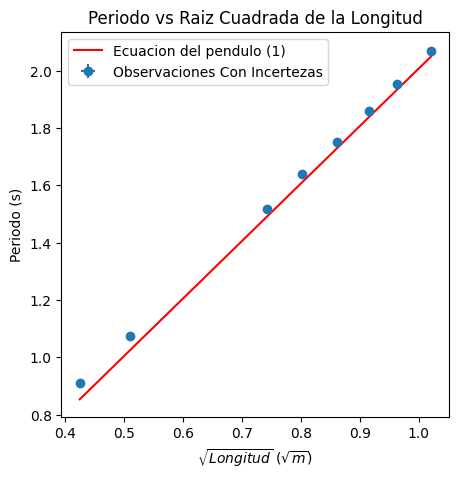

In [255]:
# 2 B

plt.figure(figsize=(5,5))
plt.title("Periodo vs Raiz Cuadrada de la Longitud")
plt.xlabel((r"$\sqrt{ {Longitud}}$ ($\sqrt{m}$)"))
plt.ylabel("Periodo (s)")

plt.errorbar(incertezas['sqrt_L'], incertezas['T'], xerr=incertezas['d_sqrt_L'], yerr=incertezas['dT'], fmt='o', label='Observaciones Con Incertezas')

x_values = np.linspace(min(incertezas['sqrt_L']), max(incertezas['sqrt_L']), 100)

def ecuacion_del_pendulo_2(sqrt_l):
    return 2 * np.pi * sqrt_l / np.sqrt(g_real)

plt.plot(x_values, ecuacion_del_pendulo_2(x_values), color='red', label='Ecuacion del pendulo (1)')

plt.legend()

plt.show()



In [256]:
# 2 D

def delta_T2(T2, dT):
    return 2 * T2 * dT

incertezas['T2'] = incertezas.apply(lambda row: row['T']**2, axis=1)
incertezas['d_T2'] = incertezas.apply(lambda row: delta_T2(row['T2'], row['dT']), axis=1)

incertezas

,L,dL,T,dT,sqrt_L,d_sqrt_L,T2,d_T2
0,0.181,0.001,0.910125,0.005002,0.425441,0.001175,0.828328,0.008286
1,0.261,0.001,1.073333,0.005017,0.510882,0.000979,1.152044,0.011559
2,0.552,0.001,1.517895,0.005032,0.742967,0.000673,2.304004,0.023187
3,0.644,0.001,1.638571,0.005024,0.802496,0.000623,2.684916,0.026979
4,0.743,0.001,1.751500,0.005026,0.861974,0.000580,3.067752,0.030838
5,0.839,0.001,1.859737,0.005007,0.915969,0.000546,3.458621,0.034632
6,0.927,0.001,1.954444,0.005014,0.962808,0.000519,3.819853,0.038303
7,1.042,0.001,2.069375,0.005017,1.020784,0.000490,4.282313,0.042969


## Ajustes Lineales

In [257]:
# Fit linear function between periodos and longitudes using scipy
from scipy.optimize import curve_fit

def lineal(x, m, b):
    return m * x + b

popt, pcov = curve_fit(lineal, longitudes, periodos, absolute_sigma=True)

m, b = popt
dm, db = np.sqrt(np.diag(pcov))

R2 = 1 - np.sum((lineal(np.array(longitudes), m, b) - periodos)**2) / np.sum((periodos - np.mean(periodos))**2)

print(f"m = {m:.4f} +- {dm:.4f}")
print(f"b = {b:.4f} +- {db:.4f}")
print(f"R2 = {R2:.4f}")

plt.plot(longitudes, periodos, 'o', label='Datos')
plt.plot(longitudes, lineal(np.array(longitudes), m, b), label=f"y = {m:.2f} x + {b:.2f}\n"+r"$R^2$"+f" = {R2:.4f}")

plt.xlabel("Longitud (m)")
plt.ylabel("Periodo (s)")
plt.title("Periodo en función de la longitud")
plt.legend()
plt.grid()
plt.show()

ModuleNotFoundError: No module named 'scipy'

m = 1.9450 +- 1.7772
b = 0.0790 +- 1.4313
R2 = 0.9999


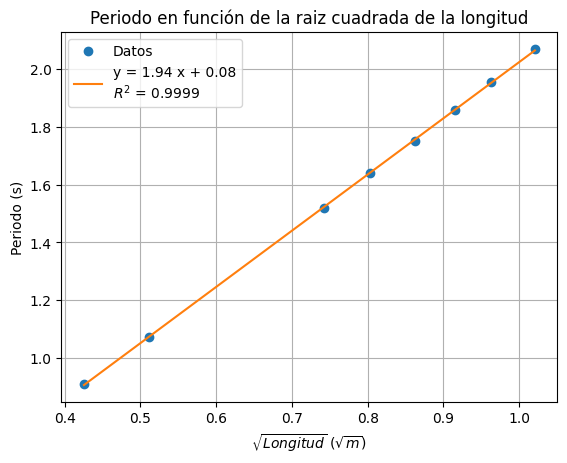

In [ ]:
# Now plot the same but using sqrt(longitudes) instead
popt, pcov = curve_fit(lineal, np.sqrt(longitudes), periodos, absolute_sigma=True)

m, b = popt
dm, db = np.sqrt(np.diag(pcov))

R2 = 1 - np.sum((lineal(np.array(np.sqrt(longitudes)), m, b) - periodos)**2) / np.sum((periodos - np.mean(periodos))**2)

print(f"m = {m:.4f} +- {dm:.4f}")
print(f"b = {b:.4f} +- {db:.4f}")
print(f"R2 = {R2:.4f}")

plt.plot(np.sqrt(longitudes), periodos, 'o', label='Datos')
plt.plot(np.sqrt(longitudes), lineal(np.array(np.sqrt(longitudes)), m, b), label=f"y = {m:.2f} x + {b:.2f}\n"+r"$R^2$"+f" = {R2:.4f}")
plt.xlabel(r"$\sqrt{ {Longitud}}$ ($\sqrt{m}$)")
plt.ylabel("Periodo (s)")
plt.title("Periodo en función de la raiz cuadrada de la longitud")
plt.legend()
plt.grid()
plt.show()

m = 1.9450 +- 1.7772
b = 0.0790 +- 1.4313
R2 = 0.9999


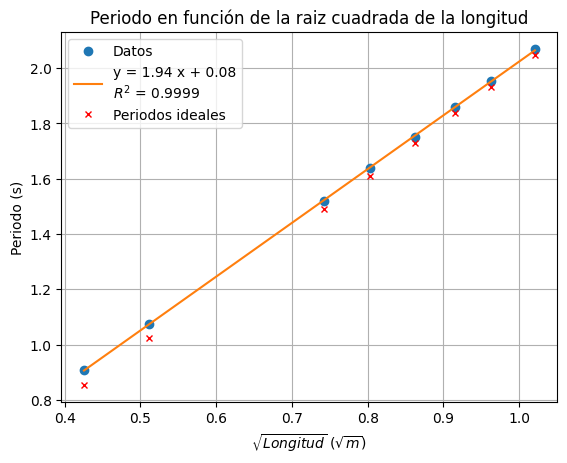

In [ ]:
# Now plot the same but using sqrt(longitudes) instead
popt, pcov = curve_fit(lineal, np.sqrt(longitudes), periodos, absolute_sigma=True)

m, b = popt
dm, db = np.sqrt(np.diag(pcov))

R2 = 1 - np.sum((lineal(np.array(np.sqrt(longitudes)), m, b) - periodos)**2) / np.sum((periodos - np.mean(periodos))**2)

print(f"m = {m:.4f} +- {dm:.4f}")
print(f"b = {b:.4f} +- {db:.4f}")
print(f"R2 = {R2:.4f}")

plt.plot(np.sqrt(longitudes), periodos, 'o', label='Datos')
plt.plot(np.sqrt(longitudes), lineal(np.array(np.sqrt(longitudes)), m, b), label=f"y = {m:.2f} x + {b:.2f}\n"+r"$R^2$"+f" = {R2:.4f}")
plt.plot(np.sqrt(longitudes), periodos_ideales, marker='x', markersize=5, linestyle="", label='Periodos ideales', color='red')
plt.xlabel(r"$\sqrt{ {Longitud}}$ ($\sqrt{m}$)")
plt.ylabel("Periodo (s)")
plt.title("Periodo en función de la raiz cuadrada de la longitud")
plt.legend()
plt.grid()
plt.show()

m = 1.0611 +- 1.0171
b = 1.0635 +- 0.6216
R2 = 0.9087


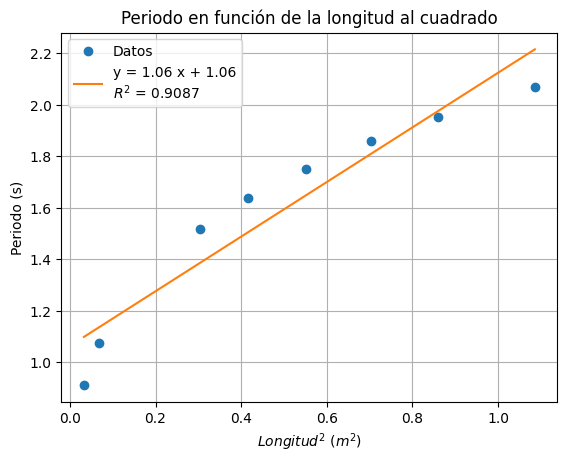

In [ ]:
# Now plot the same but using (longitudes)**2 instead
popt, pcov = curve_fit(lineal, np.array(longitudes)**2, periodos, absolute_sigma=True)

m, b = popt
dm, db = np.sqrt(np.diag(pcov))

R2 = 1 - np.sum((lineal(np.array(np.array(longitudes)**2), m, b) - periodos)**2) / np.sum((periodos - np.mean(periodos))**2)

print(f"m = {m:.4f} +- {dm:.4f}")
print(f"b = {b:.4f} +- {db:.4f}")
print(f"R2 = {R2:.4f}")

plt.plot(np.array(longitudes)**2, periodos, 'o', label='Datos')
plt.plot(np.array(longitudes)**2, lineal(np.array(np.array(longitudes)**2), m, b), label=f"y = {m:.2f} x + {b:.2f}\n"+r"$R^2$"+f" = {R2:.4f}")
plt.xlabel(r"$Longitud^2$ ($m^2$)")
plt.ylabel("Periodo (s)")
plt.title("Periodo en función de la longitud al cuadrado")
plt.legend()
plt.grid()
plt.show()



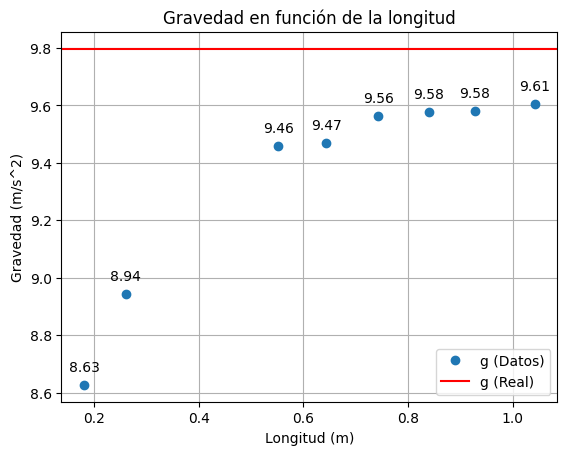

In [ ]:
# g = (2*np.pi / T)^2 * L

g_est = (2*np.pi / np.array(periodos))**2 * np.array(longitudes)

plt.plot(longitudes, g_est, 'o', label='g (Datos)')
plt.axhline(y=g_real, color='r', linestyle='-', label='g (Real)')

for i, g in enumerate(g_est):
    txt = f"{g:.2f}"
    plt.annotate(txt, (longitudes[i], g_est[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel("Longitud (m)")
plt.ylabel("Gravedad (m/s^2)")
plt.title("Gravedad en función de la longitud")
plt.legend()
plt.grid()
plt.show()
